In [2]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline


USAGE_STR = """
# Purpose
# Filter the interaction frequency table for active and inactive experiment conditions
# for rows that have a cell that is > 80 %

# Also show heatmap of these interactions

"""


In [3]:
def is_high_freq(row_freq, THRESHOLD):
    """
        Determine if a row is high frequency interaction
    """
    for f in row_freq:
        if(f > THRESHOLD): return True
    return False

def high_freq_filter(table_path, THRESHOLD=0.8, output=None, write=False):
    """
        Filter rows of the table for interactions that have at least one interaction being 
        greater than THRESHOLD frequency
    """
    column_labels, row_labels, data = [], [], []
    f = open(table_path, 'r')
    if(write == True):
        fw = open(output, 'w')
        
    header = f.readline()
    column_labels = header.strip().split("\t")
    if(write == True):
        fw.write(header)
    for line in f:
        linfo = line.strip().split("\t")
        if is_high_freq(map(float, linfo[1:]), THRESHOLD):
            if(write == True):
                fw.write(line)
            row_labels.append(linfo[0])
            data.append(map(float, linfo[1:]))
    return column_labels[1:], row_labels, np.array(data)
    
def heatmap_seaborne(column_labels, row_labels, data, title, x=12, y=15, annot=True):
    """
        Generate heatmap 
    """
    plt.figure(figsize=(x,y))
    sns.set_style("whitegrid")
    if(annot == True):
        ax = sns.heatmap(data, annot=annot, xticklabels=column_labels, yticklabels=row_labels, cmap="Greys",cbar=False)
    else:
        y_null_label = [""]*len(row_labels)
        ax = sns.heatmap(data, annot=annot, xticklabels=column_labels, yticklabels=y_null_label, cmap="Greys", cbar=False)
    
def clustermap_seaborne(column_labels, row_labels, data, title, x=12, y=15):
    """
        Generate clustermap
    """
    sns.set_style("whitegrid")
    ax = sns.clustermap(data, annot=True, xticklabels=column_labels, yticklabels=row_labels, cmap="Greys", figsize=(x,y), col_cluster=False)

    

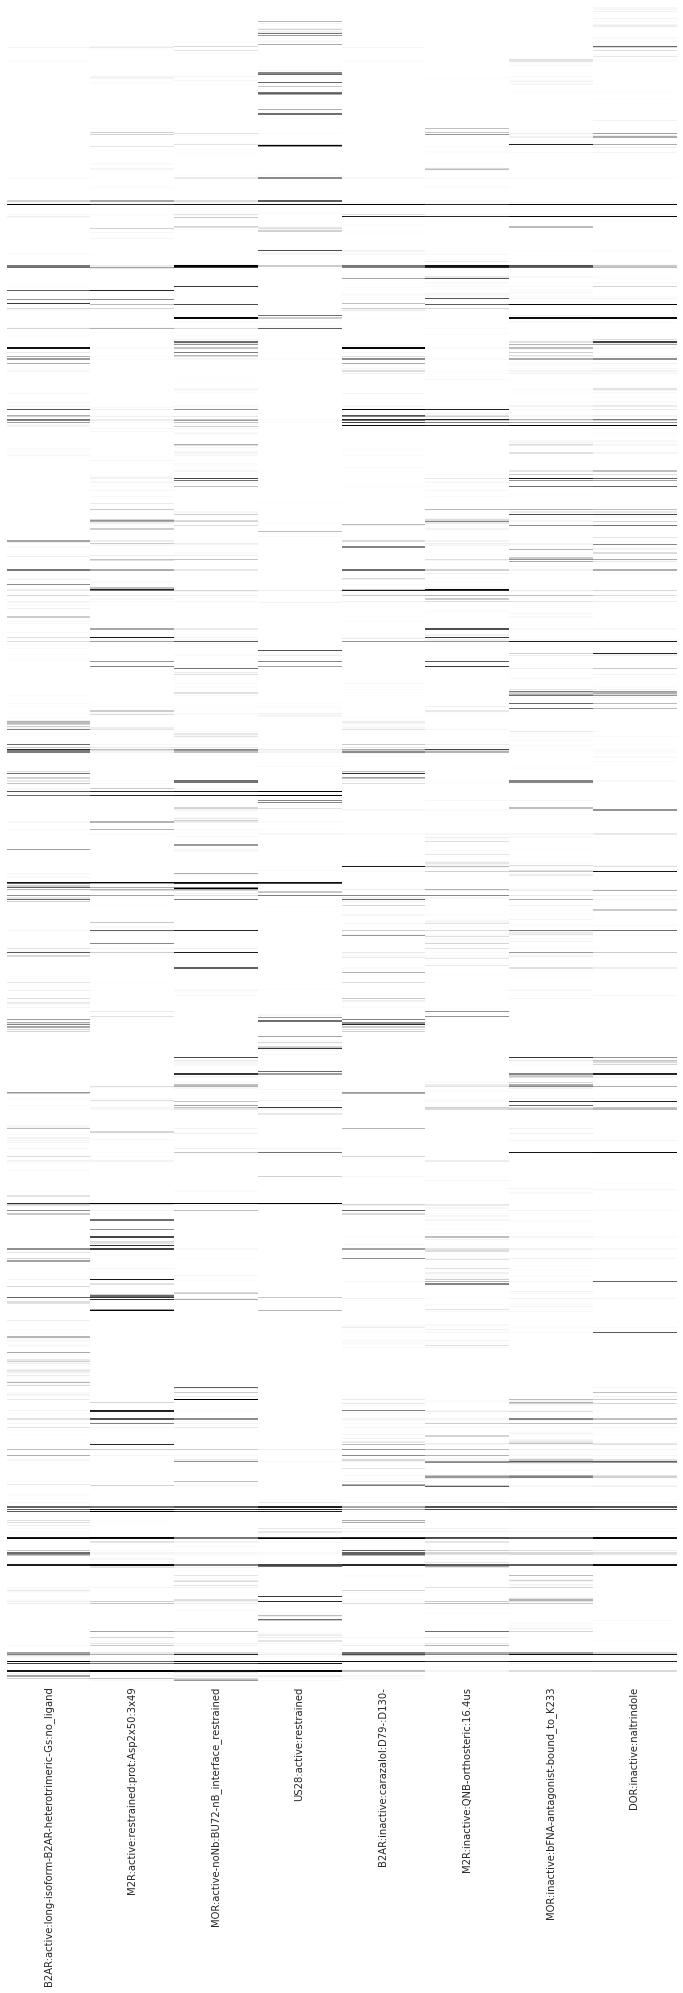

In [20]:
# All receptors all freq
# all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"


# All simulation frames
all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
column_labels, row_labels, data = high_freq_filter(all_receptor_freqs, 0)
# heatmap_seaborne(column_labels, row_labels, data, "All Receptors", 12, 15, False)
heatmap_seaborne(column_labels, row_labels, data, "All Receptors", 12, 30, False)




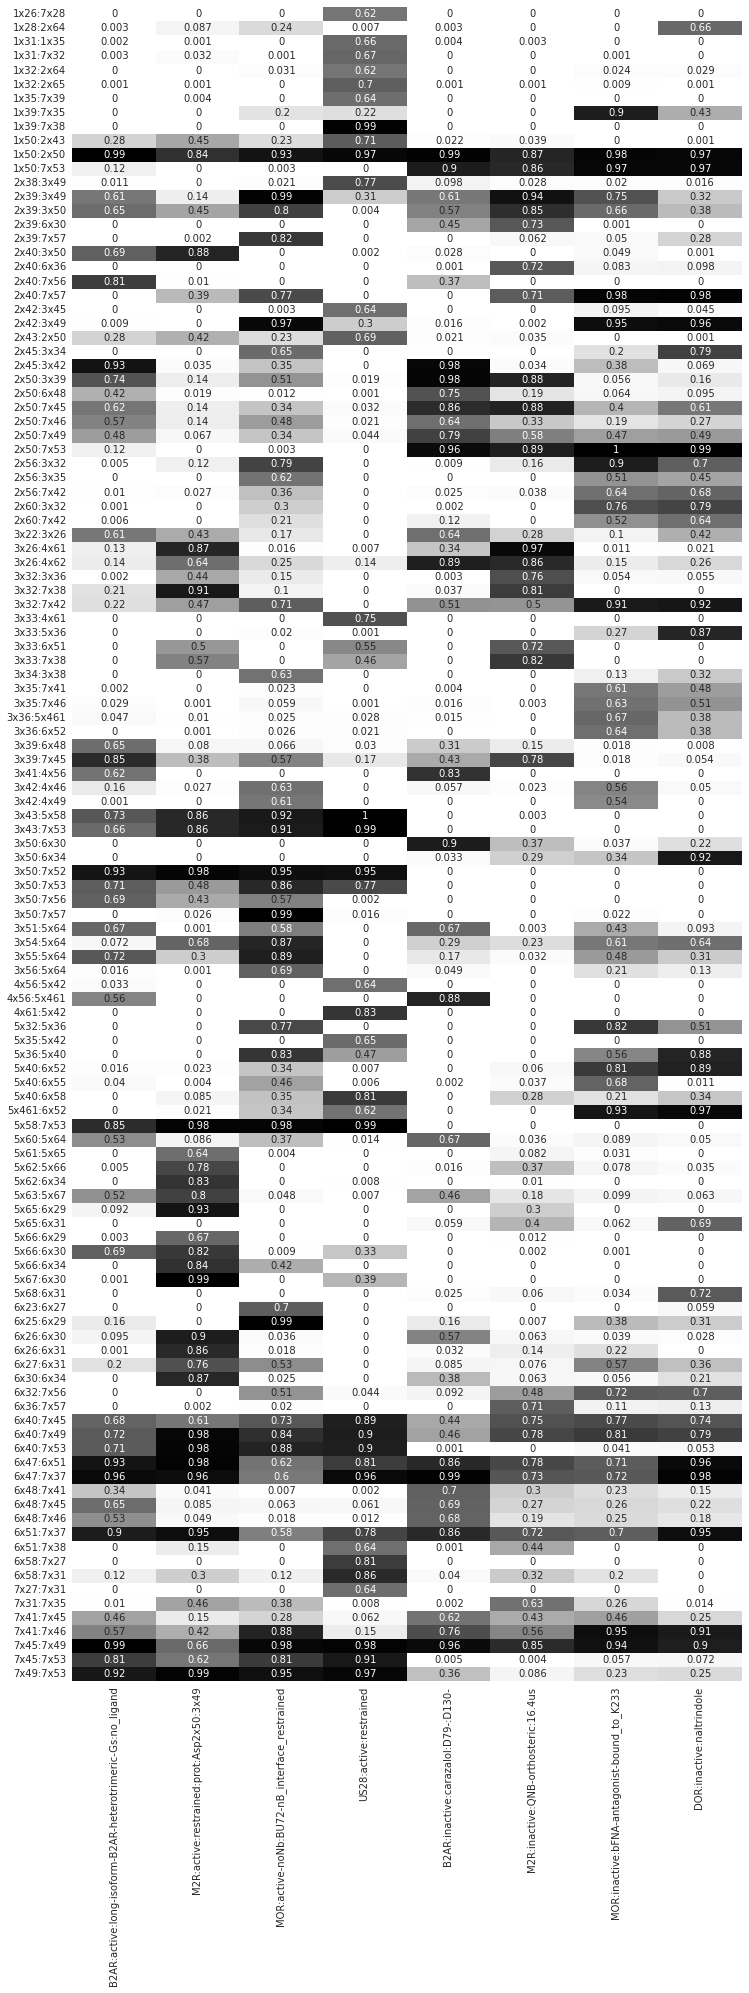

In [26]:
# All receptors high freq
# all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
# all_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_filtered_freq80.txt"


# All simulation frames
all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
all_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/all_receptors/joined_receptors_filtered_freq60.txt"
column_labels, row_labels, data = high_freq_filter(all_receptor_freqs, THRESHOLD=0.6, output=all_output, write=True)
# heatmap_seaborne(column_labels, row_labels, data, "All Receptors", 12, 15)
heatmap_seaborne(column_labels, row_labels, data, "All Receptors", 12, 30)




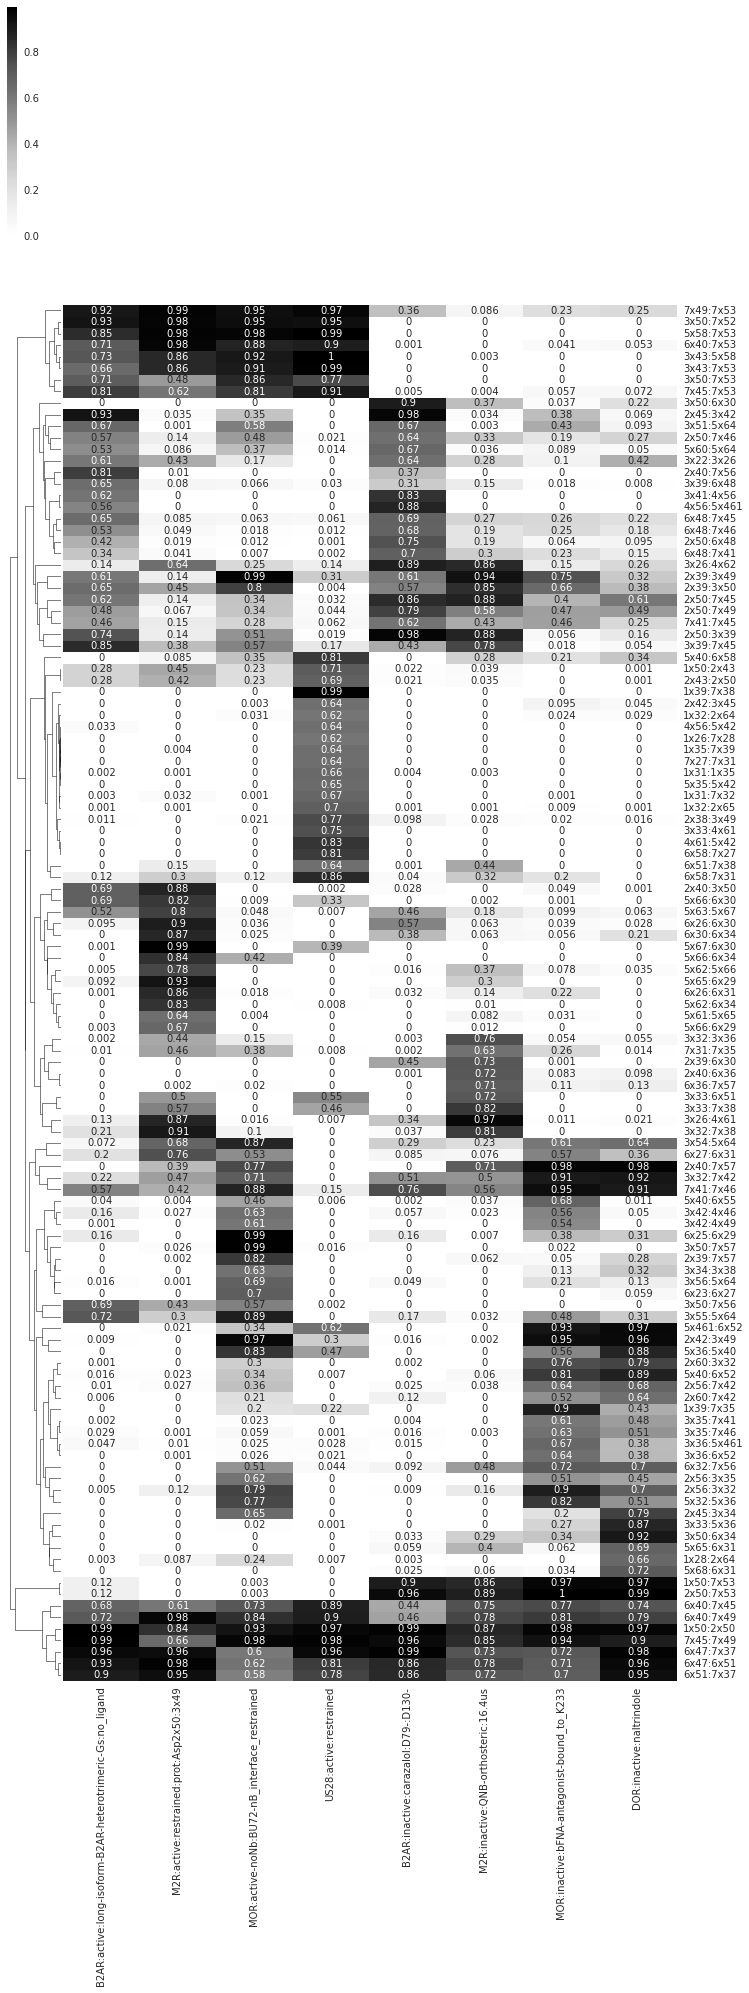

In [27]:
# All receptors, high frequency, clustered

# all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
# all_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/all_receptors/joined_receptors_filtered_freq80.txt"


# All simulation frames
all_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/all_receptors/joined_receptors_non_state_decomp_residue_resolution_filtered.txt"
all_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/all_receptors/joined_receptors_filtered_freq60.txt"

column_labels, row_labels, data = high_freq_filter(all_receptor_freqs, 0.6, all_output)
# clustermap_seaborne(column_labels, row_labels, data, "All Receptors", 12, 15)
clustermap_seaborne(column_labels, row_labels, data, "All Receptors", 12, 30)



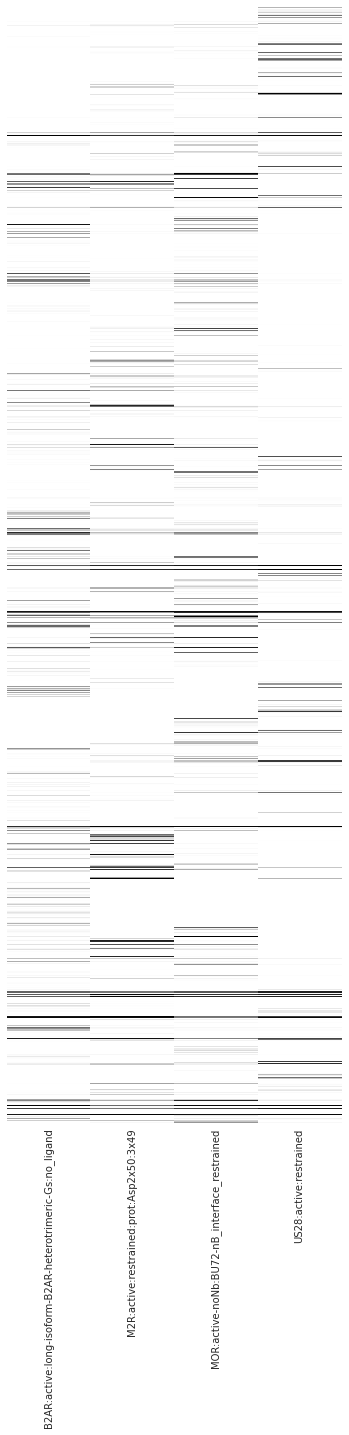

In [19]:
# Active receptors all freq

# active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"


# All simulation frames
active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"
column_labels, row_labels, data = high_freq_filter(active_receptor_freqs, 0)
# heatmap_seaborne(column_labels, row_labels, data, "Active Receptors", 6, 10, False)
heatmap_seaborne(column_labels, row_labels, data, "Active Receptors", 6, 20, False)


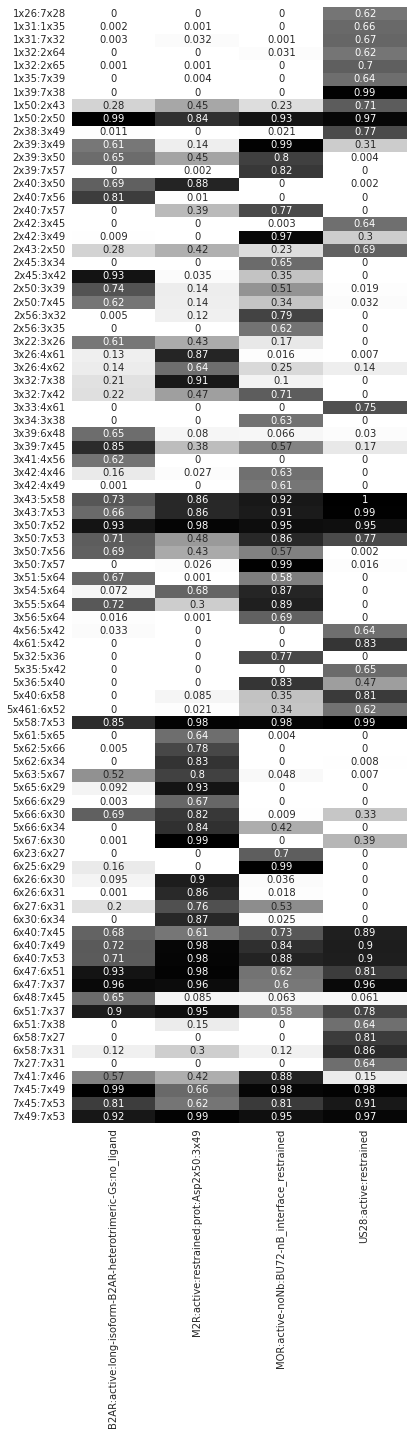

In [28]:
# Active receptors high freq

# active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"
# active_output= "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/active_receptors/active_filtered_freq80.txt"


# All simulation frames
active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"
active_output= "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/active_receptors/active_filtered_freq60.txt"
column_labels, row_labels, data = high_freq_filter(active_receptor_freqs, 0.6, active_output, True)
# heatmap_seaborne(column_labels, row_labels, data, "Active Receptors", 6, 10)
heatmap_seaborne(column_labels, row_labels, data, "Active Receptors", 6, 20)


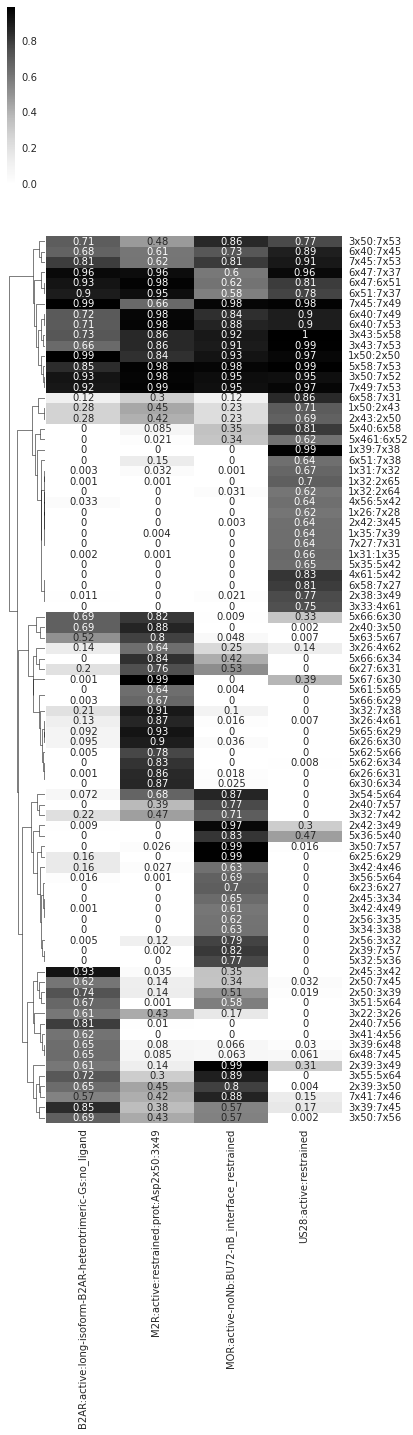

In [33]:
# Active receptors high frequency clustered

# active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"
# active_output= "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/active_receptors/active_filtered_freq80.txt"

# All simulation frames

active_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/active_receptors/active_non_state_decomp_residue_resolution_filtered.txt"
active_output= "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/active_receptors/active_filtered_freq60.txt"

column_labels, row_labels, data = high_freq_filter(active_receptor_freqs, 0.6, active_output)
# clustermap_seaborne(column_labels, row_labels, data, "Active Receptors", 6, 10)
clustermap_seaborne(column_labels, row_labels, data, "Active Receptors", 6, 20)


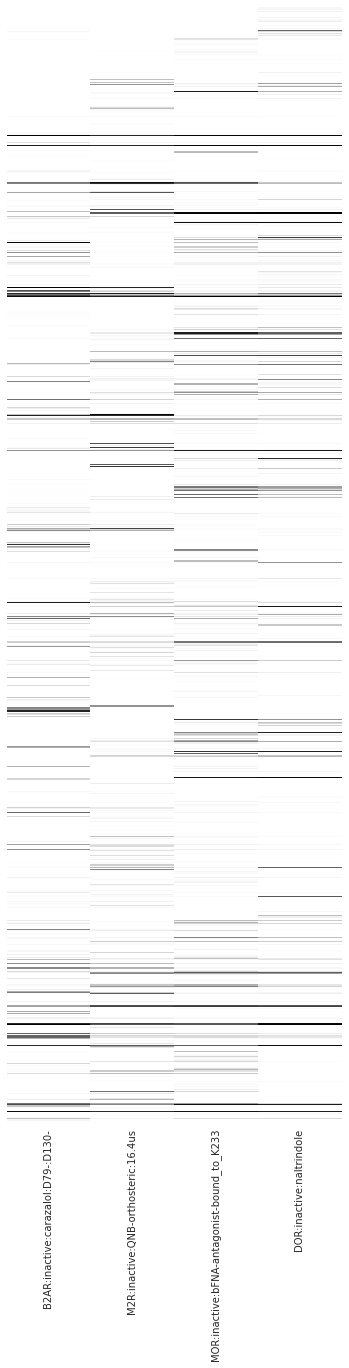

In [21]:
# Inactive receptors all freq 

# All simulation frames

inactive_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/inactive_receptors/inactive_non_state_decomp_residue_resolution_filtered.txt"
column_labels, row_labels, data = high_freq_filter(inactive_receptor_freqs, 0)
# heatmap_seaborne(column_labels, row_labels, data, "Inactive Receptors", 6, 10, False)
heatmap_seaborne(column_labels, row_labels, data, "Inactive Receptors", 6, 20, False)


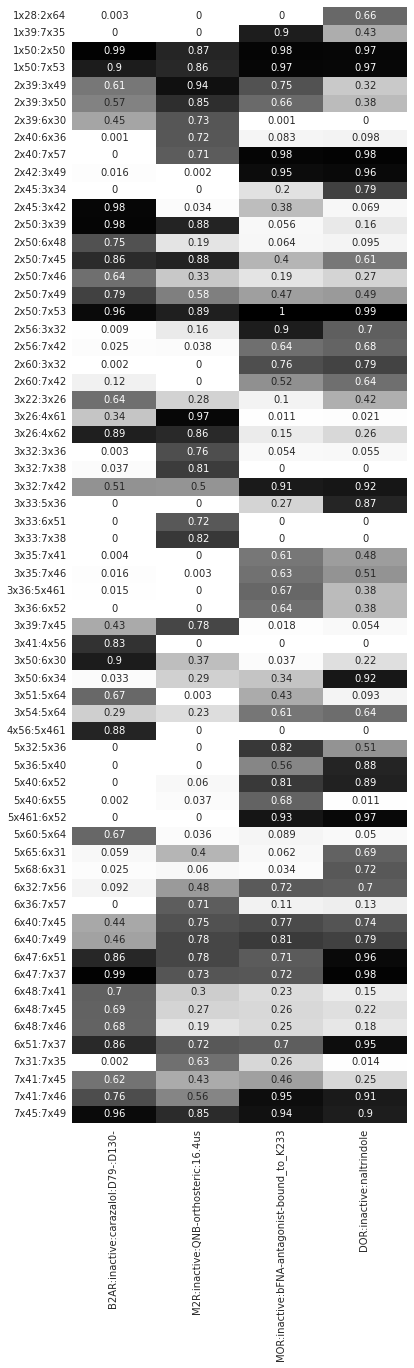

In [30]:
# Inactive receptors high freq 

# inactive_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/inactive_receptors/inactive_non_state_decomp_residue_resolution_filtered.txt"
# inactive_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/inactive_receptors/inactive_filtered_freq80.txt"

# All simulation frames
inactive_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/inactive_receptors/inactive_non_state_decomp_residue_resolution_filtered.txt"
inactive_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/inactive_receptors/inactive_filtered_freq60.txt"

column_labels, row_labels, data = high_freq_filter(inactive_receptor_freqs, 0.6, inactive_output, True)
# heatmap_seaborne(column_labels, row_labels, data, "Inactive Receptors", 6, 10)
heatmap_seaborne(column_labels, row_labels, data, "Inactive Receptors", 6, 20)


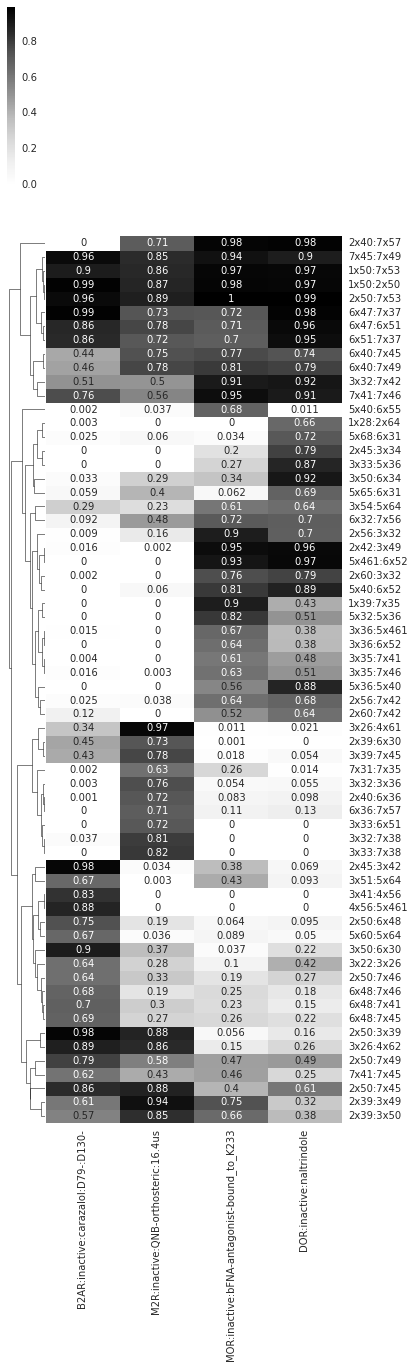

In [32]:
# Inactive receptors high freq clustered

# inactive_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/inactive_receptors/inactive_non_state_decomp_residue_resolution_filtered.txt"
# inactive_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/022417_union_wb_freq/wb_wb2/inactive_receptors/inactive_filtered_freq80.txt"

# All simulation frames
inactive_receptor_freqs = "/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/inactive_receptors/inactive_non_state_decomp_residue_resolution_filtered.txt"
inactive_output="/scratch/PI/rondror/akma327/DynamicNetworks/results/non-state-decomposition/residue-resolution-combined-rep/040117_union_wb_freq/wb_wb2/inactive_receptors/inactive_filtered_freq60.txt"

column_labels, row_labels, data = high_freq_filter(inactive_receptor_freqs, 0.6, inactive_output)
# clustermap_seaborne(column_labels, row_labels, data, "Inactive Receptors", 6, 10)
clustermap_seaborne(column_labels, row_labels, data, "Inactive Receptors", 6, 20)
